In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [2]:
!pip install wheel

In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install pycountry

In [6]:
import sys
print(sys.executable)

C:\Users\shiva\AppData\Local\Programs\Python\Python310\python.exe


In [7]:
!pip install wordcloud

In [8]:
!pip install langdetect

In [9]:
!pip3 install -U scikit-learn scipy matplotlib

In [10]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
# Authentication
consumerKey = "MDgg3oqedUXePlEtH8MASRp7Z"
consumerSecret = "WpUvyvQJA47HR6lXpwKsO55hul3Iy94l9aaTvpITspERK0sewp"
accessToken = "531477041-Ww7xBkmD3V2A4LqkvSctP6GWseGKk21zinC6iZSd"
accessTokenSecret = "eWwmuH1qLb5DDgEiQ9bBaBIAKHx53oN5Y77MTurIj4cN4"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [13]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: UCMO
Please enter how many tweets to analyze: 3000


In [14]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  56
positive number:  29
negative number:  1
neutral number:  26


In [15]:
tweet_list

,0
0,Do you struggle with getting clean audio for y...
1,Have you discovered our Youtube channel? \nHea...
2,Real Estate Investing LIVE Q&amp;A \nTonight (...
3,Do you prefer Lightroom or Photoshop for photo...
4,Interested in audio and have a love for horror...
5,Adobe Lightroom gives you the ability to take ...
6,RT @UCMHarmonEdge: Don't miss the MuleNation G...
7,"Continuing our winning tradition, students and..."
8,RT @UCMTheBeat: Can't make it to the UCM Choir...
9,Don't miss the MuleNation Graduation Celebrati...


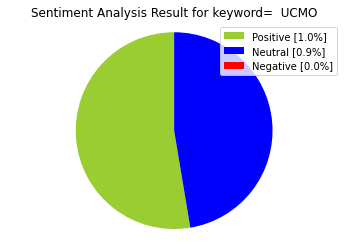

In [16]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [17]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [18]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Do you struggle with getting clean audio for y...,Do you struggle with getting clean audio for y...
1,Have you discovered our Youtube channel? \nHea...,Have you discovered our Youtube channel? \nHea...
2,Real Estate Investing LIVE Q&amp;A \nTonight (...,Real Estate Investing LIVE Q&amp;A \nTonight (...
3,Do you prefer Lightroom or Photoshop for photo...,Do you prefer Lightroom or Photoshop for photo...
4,Interested in audio and have a love for horror...,Interested in audio and have a love for horror...
5,Adobe Lightroom gives you the ability to take ...,Adobe Lightroom gives you the ability to take ...
6,RT @UCMHarmonEdge: Don't miss the MuleNation G...,RT @UCMHarmonEdge: Don't miss the MuleNation G...
7,"Continuing our winning tradition, students and...","Continuing our winning tradition, students and..."
8,RT @UCMTheBeat: Can't make it to the UCM Choir...,RT @UCMTheBeat: Can't make it to the UCM Choir...
9,Don't miss the MuleNation Graduation Celebrati...,Don't miss the MuleNation Graduation Celebrati...


In [19]:
tweet_list

,0,text
0,Do you struggle with getting clean audio for y...,Do you struggle with getting clean audio for y...
1,Have you discovered our Youtube channel? \nHea...,Have you discovered our Youtube channel? \nHea...
2,Real Estate Investing LIVE Q&amp;A \nTonight (...,Real Estate Investing LIVE Q&amp;A \nTonight (...
3,Do you prefer Lightroom or Photoshop for photo...,Do you prefer Lightroom or Photoshop for photo...
4,Interested in audio and have a love for horror...,Interested in audio and have a love for horror...
5,Adobe Lightroom gives you the ability to take ...,Adobe Lightroom gives you the ability to take ...
6,RT @UCMHarmonEdge: Don't miss the MuleNation G...,RT @UCMHarmonEdge: Don't miss the MuleNation G...
7,"Continuing our winning tradition, students and...","Continuing our winning tradition, students and..."
8,RT @UCMTheBeat: Can't make it to the UCM Choir...,RT @UCMTheBeat: Can't make it to the UCM Choir...
9,Don't miss the MuleNation Graduation Celebrati...,Don't miss the MuleNation Graduation Celebrati...


In [20]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Do you struggle with getting clean audio for y...,do you struggle with getting clean audio for y...
1,Have you discovered our Youtube channel? \nHea...,have you discovered our youtube channel hear...
2,Real Estate Investing LIVE Q&amp;A \nTonight (...,real estate investing live q amp a tonight t...
3,Do you prefer Lightroom or Photoshop for photo...,do you prefer lightroom or photoshop for photo...
4,Interested in audio and have a love for horror...,interested in audio and have a love for horror...
5,Adobe Lightroom gives you the ability to take ...,adobe lightroom gives you the ability to take ...
6,RT @UCMHarmonEdge: Don't miss the MuleNation G...,don t miss the mulenation graduation celebrat...
7,"Continuing our winning tradition, students and...",continuing our winning tradition students and...
8,RT @UCMTheBeat: Can't make it to the UCM Choir...,can t make it to the ucm choirs masterworks c...
9,Don't miss the MuleNation Graduation Celebrati...,don t miss the mulenation graduation celebrati...


In [21]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Do you struggle with getting clean audio for y...,do you struggle with getting clean audio for y...,0.366667,0.700000,positive,0.093,0.685,0.222,0.4939
1,Have you discovered our Youtube channel? \nHea...,have you discovered our youtube channel hear...,0.425000,0.666667,positive,0.000,0.849,0.151,0.4939
2,Real Estate Investing LIVE Q&amp;A \nTonight (...,real estate investing live q amp a tonight t...,0.168182,0.400000,neutral,0.000,1.000,0.000,0.0000
3,Do you prefer Lightroom or Photoshop for photo...,do you prefer lightroom or photoshop for photo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,Interested in audio and have a love for horror...,interested in audio and have a love for horror...,0.345238,0.545238,positive,0.129,0.629,0.241,0.4939
5,Adobe Lightroom gives you the ability to take ...,adobe lightroom gives you the ability to take ...,0.000000,0.178571,positive,0.000,0.892,0.108,0.3182
6,RT @UCMHarmonEdge: Don't miss the MuleNation G...,don t miss the mulenation graduation celebrat...,0.400000,0.800000,positive,0.080,0.754,0.166,0.4019
7,"Continuing our winning tradition, students and...",continuing our winning tradition students and...,0.033333,0.516667,positive,0.147,0.560,0.293,0.5267
8,RT @UCMTheBeat: Can't make it to the UCM Choir...,can t make it to the ucm choirs masterworks c...,0.136364,0.500000,negative,0.192,0.808,0.000,-0.6124
9,Don't miss the MuleNation Graduation Celebrati...,don t miss the mulenation graduation celebrati...,0.400000,0.800000,positive,0.080,0.754,0.166,0.4019


In [22]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [23]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [24]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,30,58.82
neutral,20,39.22
negative,1,1.96


In [25]:
class Something:
    def out(self):
        print("it works")

s = Something()
s.out()

it works


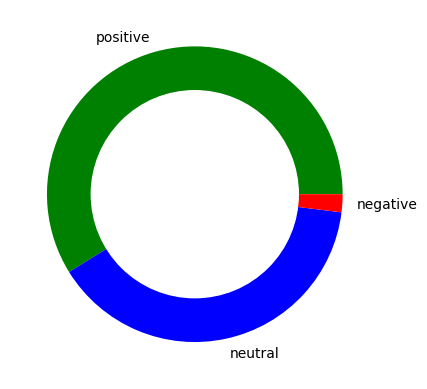

In [57]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [49]:
pwd

'C:\\Users\\shiva'

In [86]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("word-clouds-hero.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


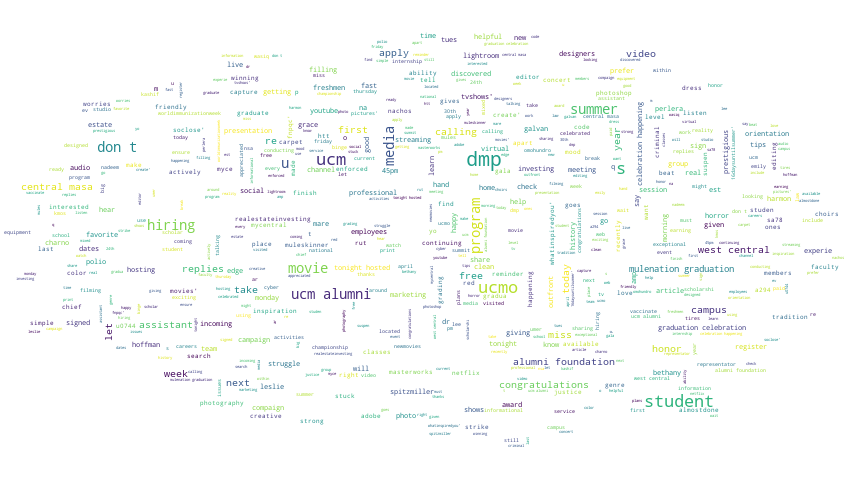

In [87]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

In [88]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("wordcloud-butterfly.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


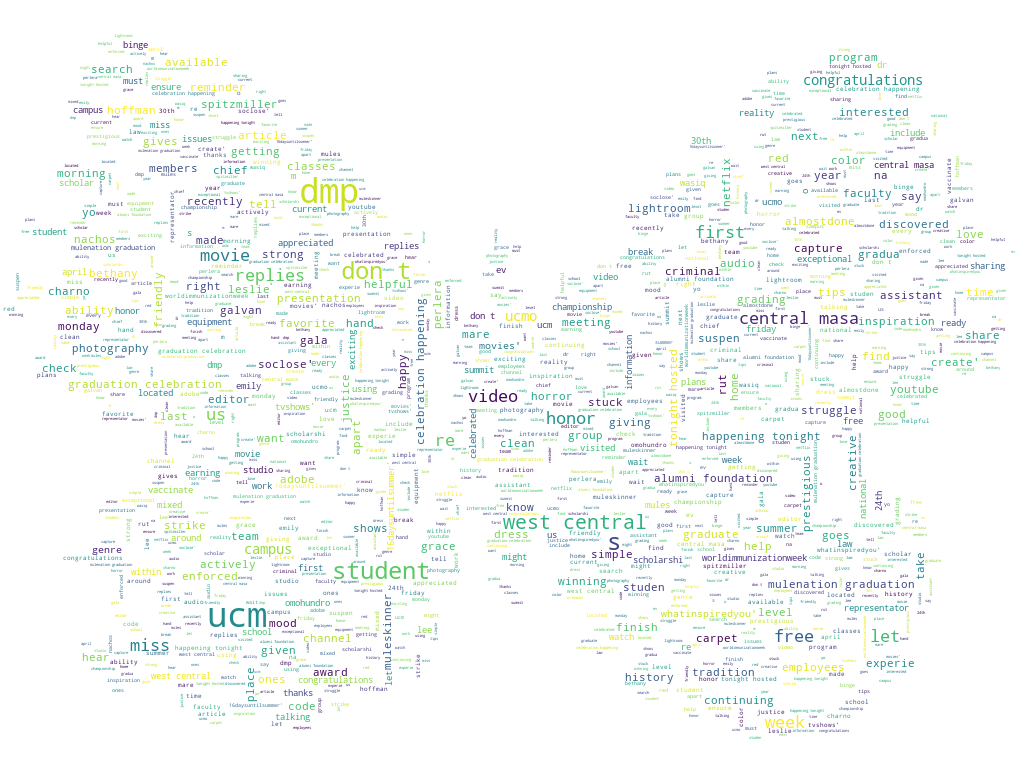

In [89]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


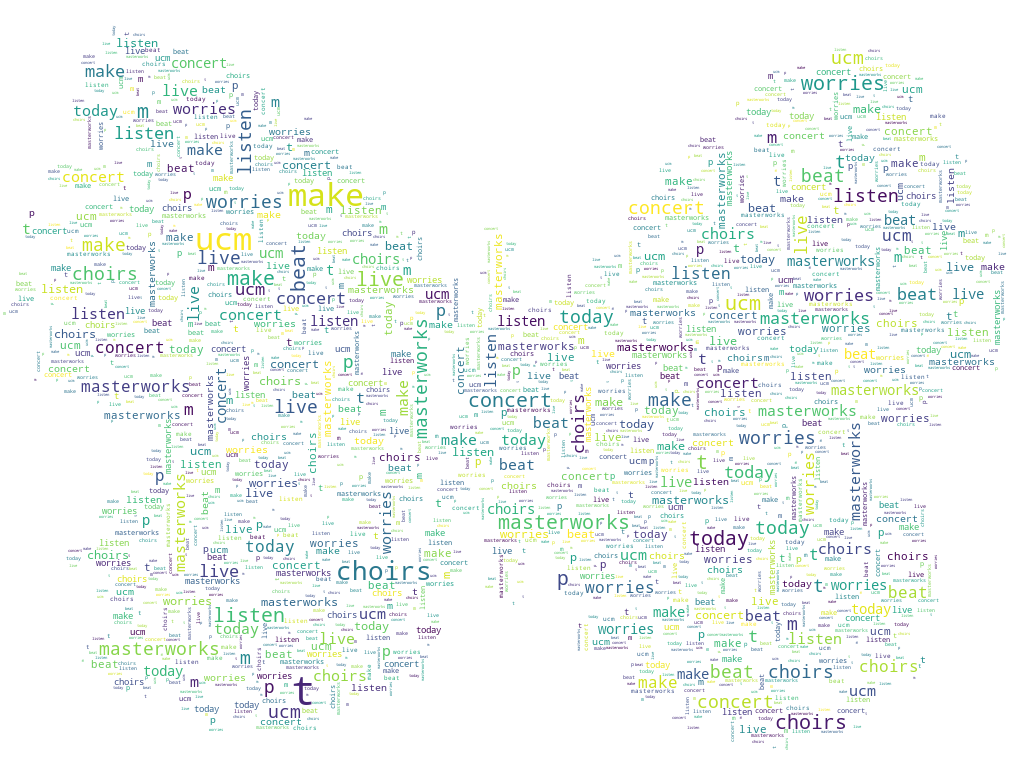

In [90]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


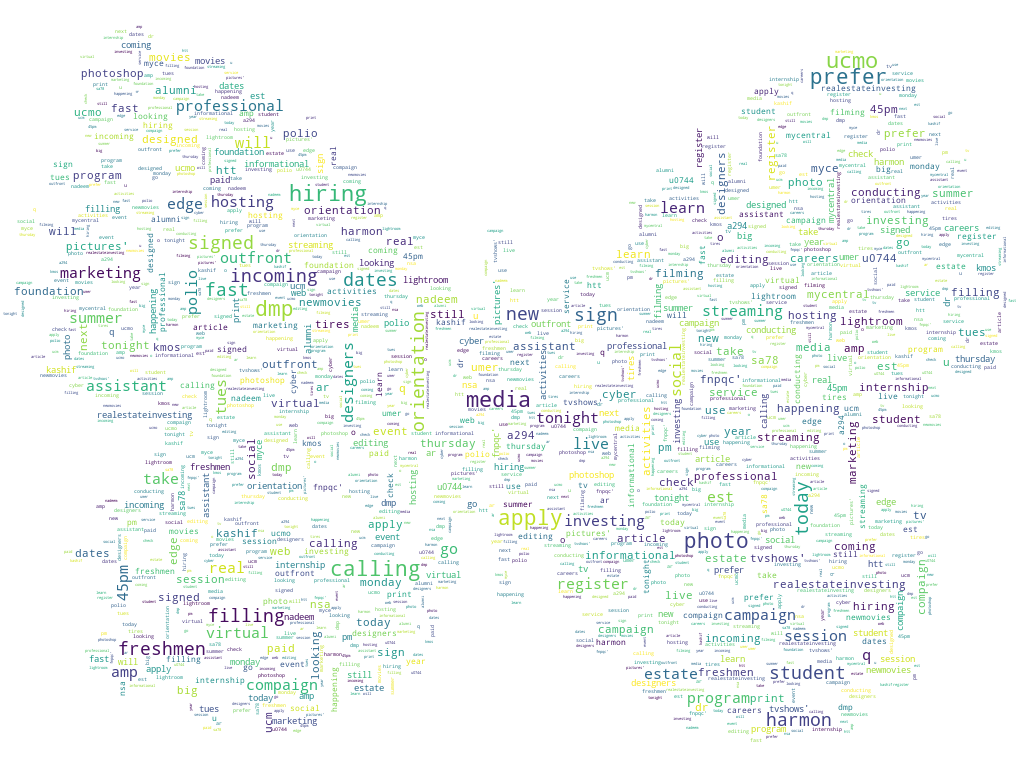

In [91]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [92]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [93]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,125.00
neutral,79.40
positive,103.93


In [94]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,27.00
neutral,12.95
positive,17.23


In [95]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [96]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [97]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [99]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [100]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [101]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Do you struggle with getting clean audio for y...,do you struggle with getting clean audio for y...,0.366667,0.700000,positive,0.093,0.685,0.222,0.4939,111,20,do you struggle with getting clean audio for y...,"[do, you, struggle, with, getting, clean, audi...","[struggle, getting, clean, audio, videos, home...","[struggl, get, clean, audio, video, home, chec..."
1,Have you discovered our Youtube channel? \nHea...,have you discovered our youtube channel hear...,0.425000,0.666667,positive,0.000,0.849,0.151,0.4939,118,19,have you discovered our youtube channel hear...,"[have, you, discovered, our, youtube, channel,...","[discovered, youtube, channel, hear, first, ha...","[discov, youtub, channel, hear, first, hand, s..."
2,Real Estate Investing LIVE Q&amp;A \nTonight (...,real estate investing live q amp a tonight t...,0.168182,0.400000,neutral,0.000,1.000,0.000,0.0000,90,13,real estate investing live q amp a tonight t...,"[real, estate, investing, live, q, amp, a, ton...","[real, estate, investing, live, q, amp, tonigh...","[real, estat, invest, live, q, amp, tonight, t..."
3,Do you prefer Lightroom or Photoshop for photo...,do you prefer lightroom or photoshop for photo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,55,9,do you prefer lightroom or photoshop for photo...,"[do, you, prefer, lightroom, or, photoshop, fo...","[prefer, lightroom, photoshop, photo, editing, ]","[prefer, lightroom, photoshop, photo, edit, ]"
4,Interested in audio and have a love for horror...,interested in audio and have a love for horror...,0.345238,0.545238,positive,0.129,0.629,0.241,0.4939,118,22,interested in audio and have a love for horror...,"[interested, in, audio, and, have, a, love, fo...","[interested, audio, love, horror, movies, righ...","[interest, audio, love, horror, movi, right, p..."


In [102]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

51 Number of reviews has 278 words


In [103]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,abil,activ,adob,almostdon,also,alumni,amp,apart,appli,...,west,whatinspiredy,win,within,work,worldimmunizationweek,worri,year,yo,youtub
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
dmp,11
student,9
ucm,9
ucmo,6
central,5
host,5
hire,5
movi,5
happen,4
foundat,4


In [105]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [106]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('ucm alumni', 4),
 ('alumni foundation', 4),
 ('west central', 4),
 ('central masa', 4),
 ('don miss', 3),
 ('miss mulenation', 3),
 ('mulenation graduation', 3),
 ('graduation celebration', 3),
 ('celebration happening', 3),
 ('happening tonight', 3),
 ('tonight hosted', 3),
 ('hosted ucm', 3),
 ('foundation free', 3),
 ('free na', 2),
 ('calling incoming', 2),
 ('incoming freshmen', 2),
 ('freshmen new', 2),
 ('new student', 2),
 ('student orientation', 2),
 ('orientation dates', 2)]

In [107]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('ucm alumni foundation', 4),
 ('west central masa', 4),
 ('don miss mulenation', 3),
 ('miss mulenation graduation', 3),
 ('mulenation graduation celebration', 3),
 ('graduation celebration happening', 3),
 ('celebration happening tonight', 3),
 ('happening tonight hosted', 3),
 ('tonight hosted ucm', 3),
 ('hosted ucm alumni', 3),
 ('alumni foundation free', 3),
 ('foundation free na', 2),
 ('calling incoming freshmen', 2),
 ('incoming freshmen new', 2),
 ('freshmen new student', 2),
 ('new student orientation', 2),
 ('student orientation dates', 2),
 ('orientation dates filling', 2),
 ('dates filling fast', 2),
 ('filling fast sign', 2)]